# **Credit Card Customer EDA**
## Step 1: Distribution of Credit Limit (LIMIT_BAL)

Objective:
Understand how credit limits are distributed across customers and identify skewness or extreme values.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/raw/UCI_Credit_Card.csv")

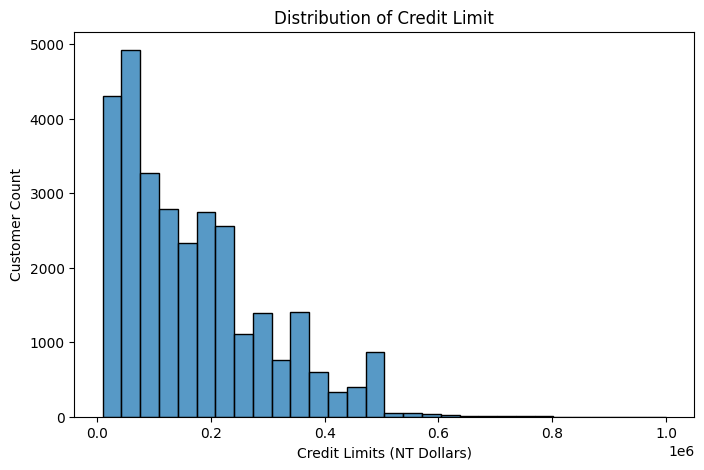

In [3]:
plt.figure(figsize=(8,5))
sns.histplot(df["LIMIT_BAL"], bins=30)
plt.title("Distribution of Credit Limit")
plt.xlabel("Credit Limits (NT Dollars)")
plt.ylabel("Customer Count")
plt.show()

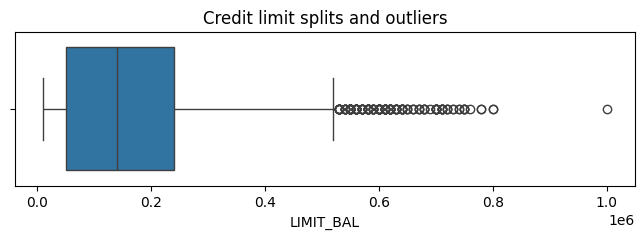

In [4]:
plt.figure(figsize=(8,2))
sns.boxplot(x=df['LIMIT_BAL'])
plt.title("Credit limit splits and outliers")
plt.show()

### Insights
The distribution of credit limits is reght-skewed, indicating that most customers have lower credit limits, while a small number of customers have very high credit limits. The box plot shows the presence of extreme high-value outliers, which are common in banking credit card data.

## Step 2: Age Distribution of Customers

Objective:
Understand the age profile of credit card customers and identify dominant age groups.


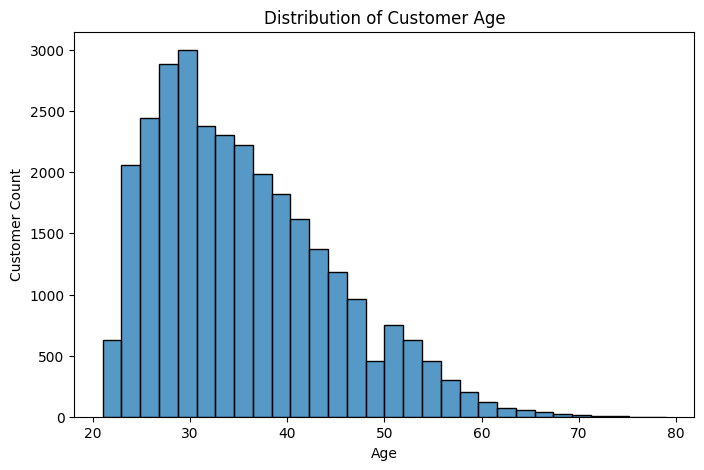

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['AGE'], bins=30)
plt.title("Distribution of Customer Age")
plt.xlabel("Age")
plt.ylabel("Customer Count")
plt.show()

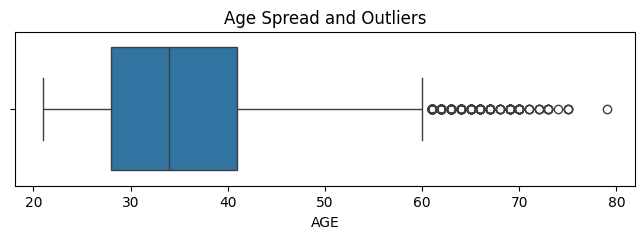

In [6]:
plt.figure(figsize=(8,2))
sns.boxplot(x=df['AGE'])
plt.title("Age Spread and Outliers")
plt.show()

### Insights
Most customers fall within the middle-age range, with fewer very young or elderly customers. The age distribution appears moderately spread with limited extrem outliers.

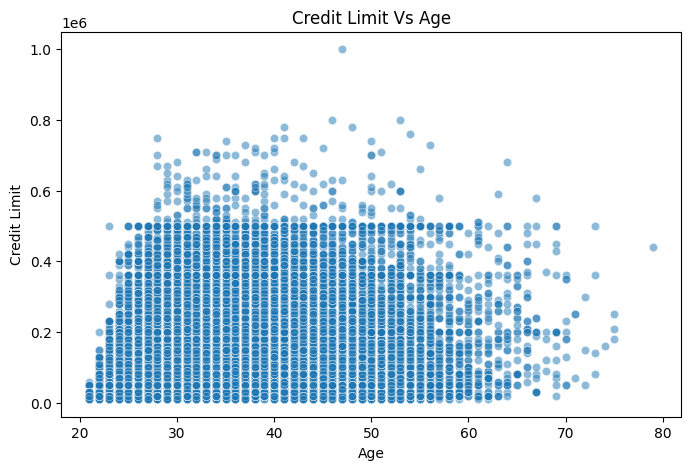

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['AGE'], y=df['LIMIT_BAL'], data=df, alpha=0.5)
plt.title("Credit Limit Vs Age")
plt.xlabel("Age")
plt.ylabel("Credit Limit")
plt.show()

### Insights 
There is no strong linear relationship between age and credit limit. Credit limits vary widely across all age groups, suggesting that factors beyond age influence credit allocation.

## Step 3: Default vs Non-default Customers

Objective:
Understand how many customers default and establish a baseline risk view.


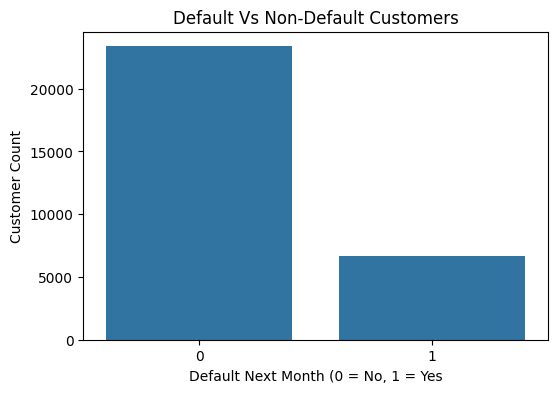

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['default.payment.next.month'], data=df)
plt.title("Default Vs Non-Default Customers")
plt.xlabel("Default Next Month (0 = No, 1 = Yes")
plt.ylabel("Customer Count")
plt.show()

### Insights
The majority of customers do not default, while a smaller but significant portion of customers default in the next month. This class imbalance is typical in credit risk dataset.

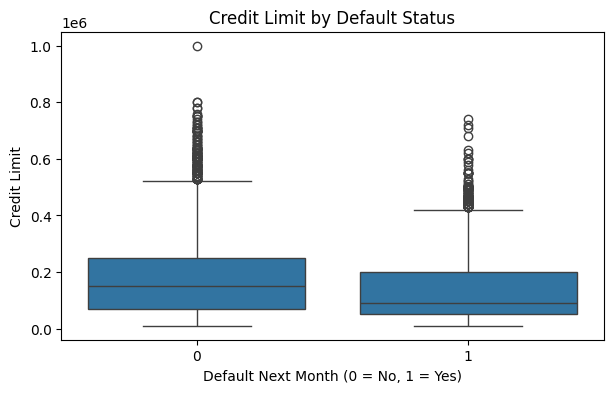

In [9]:
plt.figure(figsize=(7,4))
sns.boxplot(x="default.payment.next.month", y="LIMIT_BAL", data=df)
plt.title("Credit Limit by Default Status")
plt.xlabel("Default Next Month (0 = No, 1 = Yes)")
plt.ylabel("Credit Limit")
plt.show()

### Insights
Customers who default tend to have lower median credit limit compared to non-default customers, though there is overlap between the two groups 

## Step 4: Repayment Behavior Analysis

Objective:
Analyze customers’ repayment behavior over the past six months and identify patterns of delayed payments.


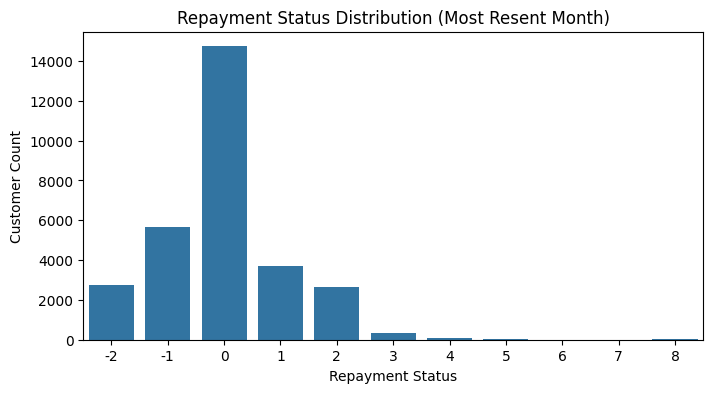

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(x='PAY_0', data=df)
plt.title("Repayment Status Distribution (Most Resent Month)")
plt.xlabel("Repayment Status")
plt.ylabel("Customer Count")
plt.show()

### Insights 
Most customers either paid on time or had no delay, while a noticable portion experienced payment delays. Higher delays values occur less frequently, indicating fewer extreme late payments. 

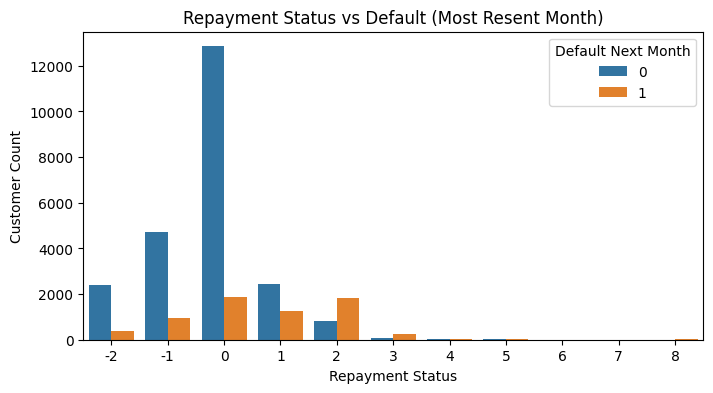

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x='PAY_0', hue='default.payment.next.month', data=df)
plt.title("Repayment Status vs Default (Most Resent Month)")
plt.xlabel("Repayment Status")
plt.ylabel("Customer Count")
plt.legend(title="Default Next Month")
plt.show()

### Insights 
Customers who default show a higher concentration of delayed repayment statuses compared to non-default customers, indicating repayment history as a strong risk signal.

## Step 5: Billing and Payment Behavior

Objective:
Analyze customer spending (bill amounts) and repayment behavior (payment amounts) to understand financial discipline.


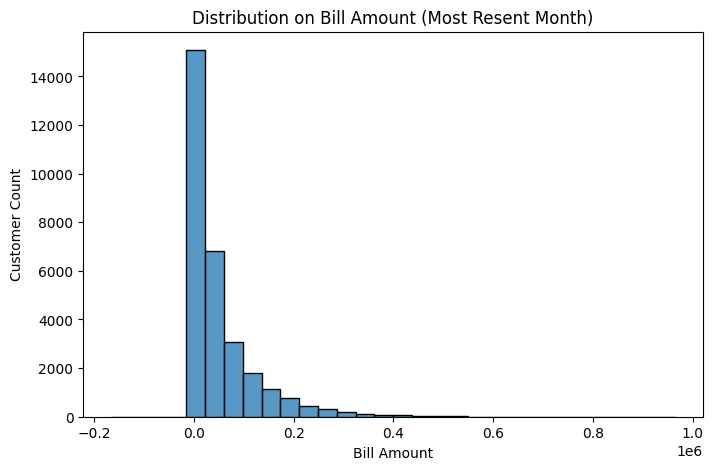

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['BILL_AMT1'], bins=30)
plt.title("Distribution on Bill Amount (Most Resent Month)")
plt.xlabel("Bill Amount")
plt.ylabel("Customer Count")
plt.show()

### Insights
Billing amounts are highly right-skewed, indicating that most customers have relatively low bills, while a small number of customers generate very high bills.

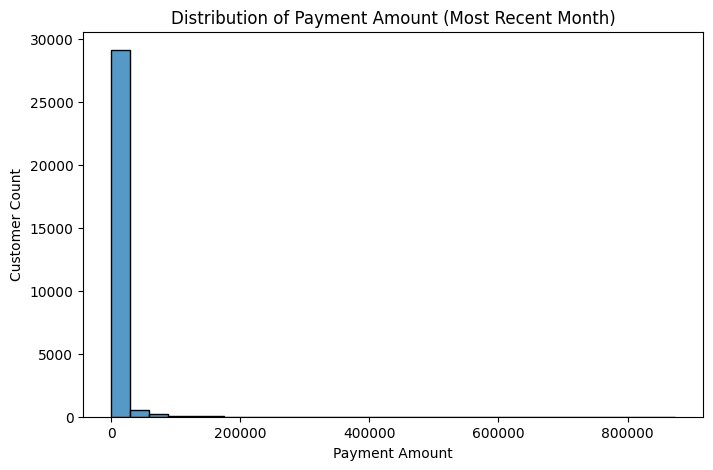

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['PAY_AMT1'], bins=30)
plt.title("Distribution of Payment Amount (Most Recent Month)")
plt.xlabel("Payment Amount")
plt.ylabel("Customer Count")
plt.show()

### Insights
Payment amounts are also right-skewed, with many customers making small payments and fewer customers making large payments.

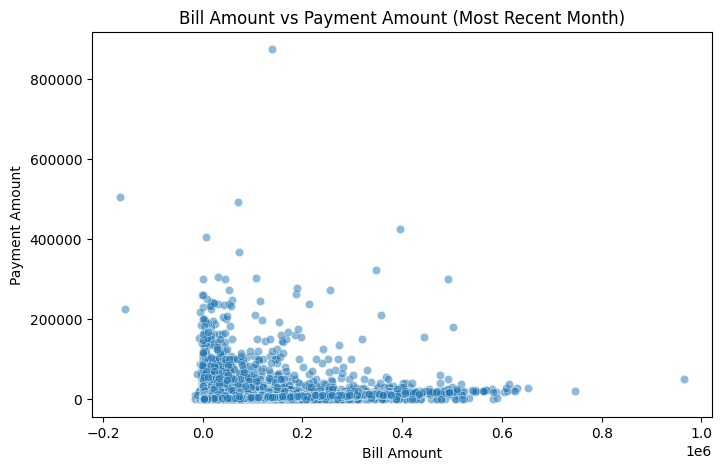

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="BILL_AMT1", y="PAY_AMT1", data=df, alpha=0.5)
plt.title("Bill Amount vs Payment Amount (Most Recent Month)")
plt.xlabel("Bill Amount")
plt.ylabel("Payment Amount")
plt.show()

### Insights
While higher bill amounts generally correspont to higher payments, there is wide variability. Some customers with high bill make relatively low payments indicating potential repayment risk.

## Step 6: Correlation Analysis

Objective:
Identify relationships between key numeric variables and understand which features move together in credit card behavior.


In [30]:
numeric_cols = ['LIMIT_BAL','AGE',
                'BILL_AMT1','BILL_AMT2','BILL_AMT3',
                'PAY_AMT1','PAY_AMT2','PAY_AMT3',
                'PAY_0','PAY_2','PAY_3',
                'default.payment.next.month']

corr_matrix = df[numeric_cols].corr()

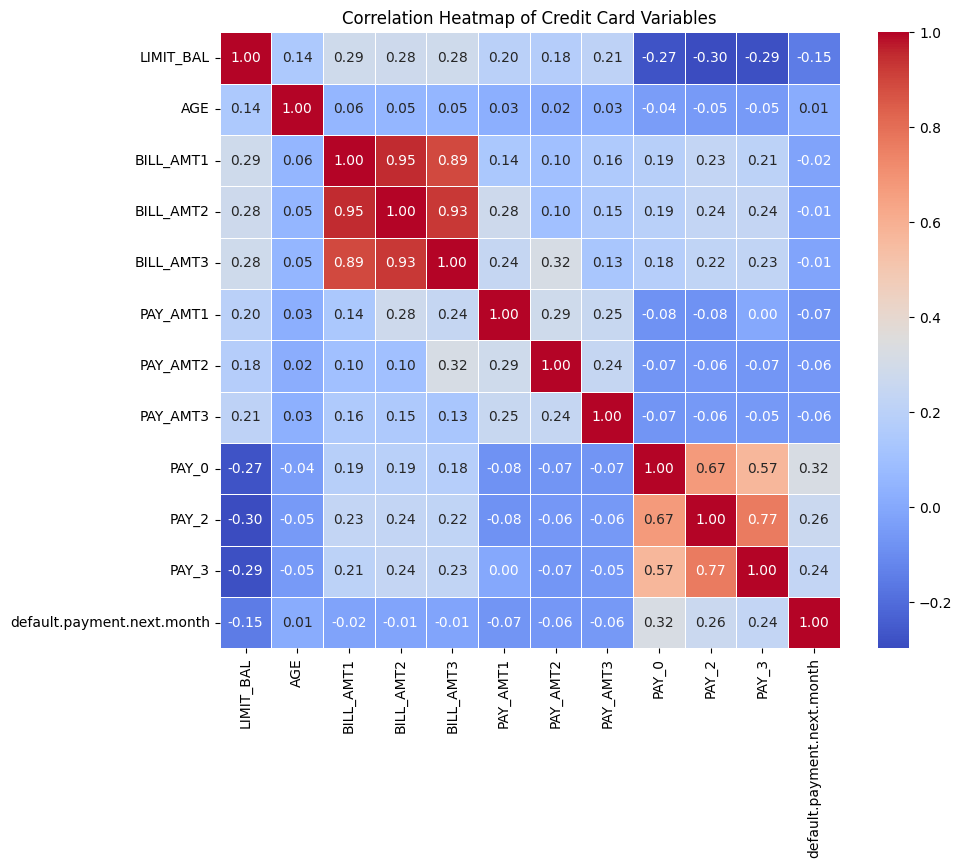

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            annot = True,
            fmt = ".2f",
            cmap = "coolwarm",
            linewidths = 0.5)
plt.title("Correlation Heatmap of Credit Card Variables")
plt.show()

### Insights 
Billing amounts across months are strongly correlated with each other, indicating spending behavior over time. Payment amount also shows correlation across months. Repayment status variables are positively associated with default, while credit limit shows a negative correlation with default, suggesting lower limits are associated with higher risk.

<br></br>
## 📌 FINAL BUSINESS INSIGHTS


🔍 Executive Summary

This project analyzes credit card customer behavior to understand credit usage, repayment patterns, and default risk using Exploratory Data Analysis (EDA). The goal is to surface risk signals and behavioral patterns that are useful for banking decision-making before applying machine learning.

📊 Key Insights (Final, Polished)
1️⃣ Credit Limit Distribution

Credit limits are highly right-skewed

Majority of customers have low to medium limits

A small group holds very high credit limits

Business meaning:
Banks concentrate exposure among a small set of customers.

2️⃣ Age vs Credit Limit

No strong relationship between age and credit limit

Credit limits vary widely across all age groups

Business meaning:
Age alone is not a reliable factor for credit allocation.

3️⃣ Default vs Non-Default Behavior

Default cases form a minority, but are clearly present

Defaulters tend to have lower median credit limits

Business meaning:
Lower credit capacity is associated with higher default risk.

4️⃣ Repayment Behavior (Core Risk Signal)

Most customers pay on time or with minimal delay

Customers with higher repayment delays show:

Higher default concentration

Riskier profiles

Business meaning:
Recent repayment history is a strong early warning signal.

5️⃣ Billing vs Payment Behavior

Bill and payment amounts are both highly skewed

Some customers pay less than billed amounts

Variability increases with higher bills

Business meaning:
Mismatch between spending and repayment may indicate future risk.

6️⃣ Correlation Analysis

Billing amounts across months are strongly correlated

Payment amounts show similar consistency

Credit limit is negatively correlated with default

Repayment delay is positively correlated with default

Business meaning:
Customer behavior is consistent over time, enabling reliable risk profiling.

🎯 Overall Business Conclusion

Customers with delayed repayments, lower credit limits, and inconsistent payment behavior exhibit higher default risk. Repayment history is the strongest behavioral indicator and should be prioritized in credit risk assessment.